<center>
    <img src="https://i.insider.com/605f4ca58e71b30018519272?width=1136&format=jpeg" width='100%'> 
</center>

----------

<h1 align="center"> Ship Satellite Image Classification </h1>
<br>
<center align="center"> <font size='4'>  Developed by: </font><font size='4' color='#33AAFBD'>Paul O'Neill </font></center>
<br>

----------

# Importing the Libraries

In [1]:
# Uploading the packages we'll need

import pandas as pd
import numpy as np

import json

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout, Activation

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


import seaborn as sns
import matplotlib.pyplot as plt

# Uploading the Images

In [2]:
# Reading in the json file

with open('../input/ships-in-satellite-imagery/shipsnet.json') as data_file:
    dataset = json.load(data_file)

In [3]:
# Turning the json information into a numpy array and then assign it as our X and y values

X = np.array(dataset['data']).astype('uint8')
y = np.array(dataset['labels']).astype('uint8')

In [4]:
# Checking the amount of ship and not a ship labels for the images

pd.Series(y).value_counts()

0    3000
1    1000
dtype: int64

In [5]:
# Identifying the class names

class_names = ['Not A Ship', 'Ship']

# Reshaping the Data

In [6]:
# The current data for each image is one long row of flattened data points representing the RGB values of each pixel

X.shape

(4000, 19200)

In [7]:
# Each item in X_reshaped will now be 3 lists, each list will be the RBG values for each pixel for the length and the width 
# of the image

X_reshaped = X.reshape([-1, 3, 80, 80])

X_reshaped.shape

(4000, 3, 80, 80)

In [8]:
# We need to change the order of the dimensions to get the correct format to plot the images 

X_reshaped = X.reshape([-1, 3, 80, 80]).transpose([0,2,3,1])

X_reshaped.shape

(4000, 80, 80, 3)

In [9]:
# The current data for y is a single integer representing the class (1 = ship, 0 = not a ship)

y.shape

(4000,)

In [10]:
# Converts the data for y to a binary class matrix

y_reshaped = tf.keras.utils.to_categorical(y, num_classes=2)

y_reshaped.shape

(4000, 2)

# Exploring the Images

In [11]:
# Separating X_reshaped to correspond with the different labels

imgs_0 = X_reshaped[y==0]
imgs_1 = X_reshaped[y==1]

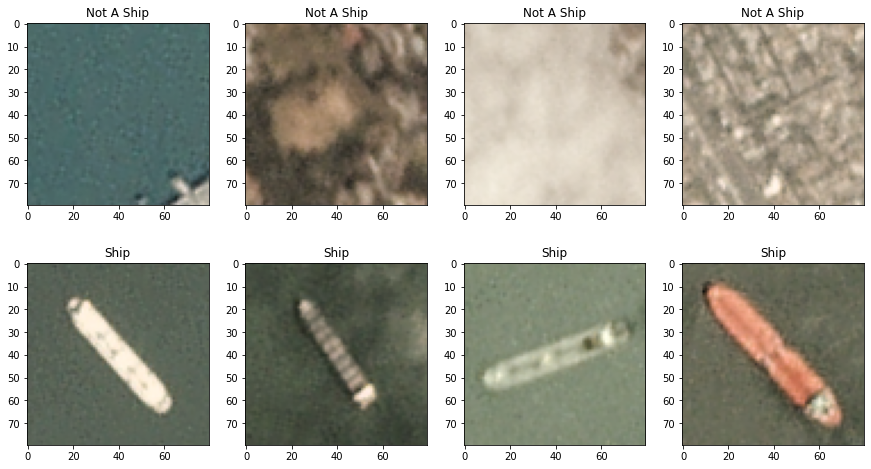

In [12]:
# Taking a quick look at a the Not a Ship pictures

def plot(a,b):

    plt.figure(figsize=(15, 15))
    plt.subplot(2,4,1)
    plt.title('Not A Ship')
    plt.imshow(a[0])
    plt.subplot(2,4,2)
    plt.title('Not A Ship')
    plt.imshow(a[1])
    plt.subplot(2,4,3)
    plt.title('Not A Ship')
    plt.imshow(a[2])
    plt.subplot(2,4,4)
    plt.title('Not A Ship')
    plt.imshow(a[3])
    plt.subplot(2,4,5)
    plt.title('Ship')
    plt.imshow(b[0])
    plt.subplot(2,4,6)
    plt.title('Ship')
    plt.imshow(b[1])
    plt.subplot(2,4,7)
    plt.title('Ship')
    plt.imshow(b[2])
    plt.subplot(2,4,8)
    plt.title('Ship')
    plt.imshow(b[3])
    plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0.25)
    
plot(imgs_0, imgs_1)

# Creating the Train/Test Split + Validation Set

In [13]:
# Normalizing the X values

X_reshaped = X_reshaped / 255

In [14]:
# Doing the initial train/test split on the reshaped values

X_train_full, X_test, y_train_full, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.20, random_state=42)

# Creating the validation set

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [15]:
X_train.shape

(2400, 80, 80, 3)

In [16]:
y_train.shape

(2400, 2)

In [17]:
X_val.shape

(800, 80, 80, 3)

In [18]:
y_val.shape

(800, 2)

In [19]:
X_test.shape

(800, 80, 80, 3)

In [20]:
y_test.shape

(800, 2)

# Setting up a Baseline Model

In [21]:
# Using Sequential and then adding the layers after

model = Sequential()
model.add(Flatten(input_shape=[80, 80, 3]))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [22]:
# Training the model

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
75/75 [==============================] - 3s 31ms/step - loss: 3.4329 - accuracy: 0.6425 - val_loss: 0.8758 - val_accuracy: 0.6388
Epoch 2/20
75/75 [==============================] - 2s 22ms/step - loss: 0.4688 - accuracy: 0.8268 - val_loss: 0.3048 - val_accuracy: 0.8763
Epoch 3/20
75/75 [==============================] - 2s 22ms/step - loss: 0.3082 - accuracy: 0.8755 - val_loss: 0.2880 - val_accuracy: 0.8888
Epoch 4/20
75/75 [==============================] - 2s 22ms/step - loss: 0.2869 - accuracy: 0.8856 - val_loss: 0.3659 - val_accuracy: 0.8737
Epoch 5/20
75/75 [==============================] - 2s 24ms/step - loss: 0.3631 - accuracy: 0.8704 - val_loss: 0.3430 - val_accuracy: 0.8575
Epoch 6/20
75/75 [==============================] - 2s 24ms/step - loss: 0.3241 - accuracy: 0.8840 - val_loss: 0.2410 - val_accuracy: 0.9087
Epoch 7/20
75/75 [==============================] - 2s 23ms/step - loss: 0.2567 - accuracy: 0.8977 - val_loss: 0.2367 - val_accuracy: 0.9112
Epoch 8/20
75

In [23]:
# Finding our final accuracy on the test set

model.evaluate(X_test, y_test)

25/25 [==============================] - 0s 7ms/step - loss: 0.2893 - accuracy: 0.8813


[0.28930842876434326, 0.8812500238418579]

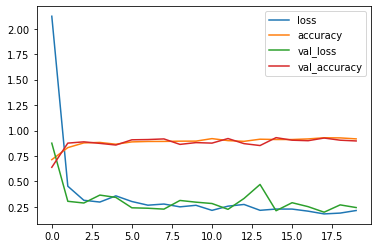

In [24]:
# Plotting the loss and accuracy

pd.DataFrame(history.history).plot();

# Adding More Epochs

In [25]:
# The loss function still looks like it's going down so testing to see if adding more epochs makes a difference

model = Sequential()
model.add(Flatten(input_shape=[80, 80, 3]))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [26]:
# Training the model

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
75/75 [==============================] - 2s 26ms/step - loss: 1.9442 - accuracy: 0.6703 - val_loss: 0.3387 - val_accuracy: 0.8487
Epoch 2/50
75/75 [==============================] - 2s 25ms/step - loss: 0.3785 - accuracy: 0.8560 - val_loss: 0.5182 - val_accuracy: 0.8125
Epoch 3/50
75/75 [==============================] - 2s 23ms/step - loss: 0.4660 - accuracy: 0.8319 - val_loss: 0.5574 - val_accuracy: 0.7613
Epoch 4/50
75/75 [==============================] - 2s 22ms/step - loss: 0.3520 - accuracy: 0.8549 - val_loss: 0.2817 - val_accuracy: 0.8900
Epoch 5/50
75/75 [==============================] - 2s 22ms/step - loss: 0.2821 - accuracy: 0.8871 - val_loss: 0.4776 - val_accuracy: 0.8037
Epoch 6/50
75/75 [==============================] - 2s 22ms/step - loss: 0.3020 - accuracy: 0.8855 - val_loss: 0.2542 - val_accuracy: 0.9013
Epoch 7/50
75/75 [==============================] - 2s 22ms/step - loss: 0.2710 - accuracy: 0.8947 - val_loss: 0.2882 - val_accuracy: 0.8763
Epoch 8/50
75

In [27]:
# Finding our final accuracy on the test set

model.evaluate(X_test, y_test)

25/25 [==============================] - 0s 7ms/step - loss: 0.2354 - accuracy: 0.9225


[0.23540407419204712, 0.9225000143051147]

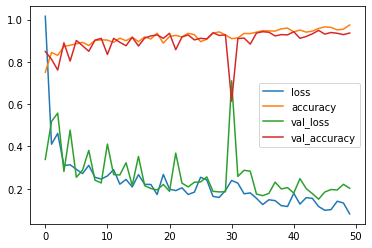

In [28]:
# Plotting the loss and accuracy

pd.DataFrame(history.history).plot();

# Adding More Layers + Softmax Activation

In [29]:
# Trying out more layers to see if we can get it even higher and adding in the softmax function for more interpretability

model = Sequential()
model.add(Flatten(input_shape=[80, 80, 3]))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [30]:
# Training the model

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
75/75 [==============================] - 2s 27ms/step - loss: 1.2688 - accuracy: 0.6464 - val_loss: 0.3316 - val_accuracy: 0.8637
Epoch 2/50
75/75 [==============================] - 2s 22ms/step - loss: 0.3914 - accuracy: 0.8521 - val_loss: 0.4627 - val_accuracy: 0.8225
Epoch 3/50
75/75 [==============================] - 2s 24ms/step - loss: 0.3895 - accuracy: 0.8296 - val_loss: 0.3158 - val_accuracy: 0.8637
Epoch 4/50
75/75 [==============================] - 2s 23ms/step - loss: 0.3197 - accuracy: 0.8755 - val_loss: 0.2896 - val_accuracy: 0.8838
Epoch 5/50
75/75 [==============================] - 2s 23ms/step - loss: 0.2839 - accuracy: 0.8871 - val_loss: 0.3240 - val_accuracy: 0.8813
Epoch 6/50
75/75 [==============================] - 2s 24ms/step - loss: 0.2860 - accuracy: 0.8858 - val_loss: 0.2446 - val_accuracy: 0.9075
Epoch 7/50
75/75 [==============================] - 2s 22ms/step - loss: 0.2737 - accuracy: 0.8925 - val_loss: 0.2801 - val_accuracy: 0.9000
Epoch 8/50
75

In [31]:
# Finding our final accuracy on the test set

model.evaluate(X_test, y_test)

25/25 [==============================] - 0s 7ms/step - loss: 0.2034 - accuracy: 0.9300


[0.2034318596124649, 0.9300000071525574]

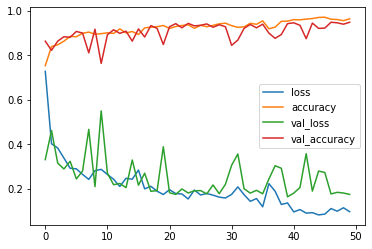

In [32]:
# Plotting the loss and accuracy

pd.DataFrame(history.history).plot();

In [33]:
# Finding the percentage predictions for each item in the test set

y_pred = model.predict(X_test)

In [34]:
# Taking a look at the first prediction

pd.Series(y_pred[0], index=class_names)

Not A Ship    0.098496
Ship          0.901504
dtype: float32

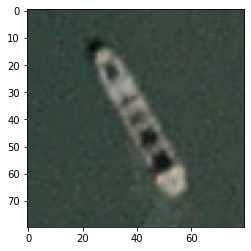

In [35]:
# Looks like a ship to me!

plt.imshow(X_test[0])

In [36]:
# Putting all of the predictions in a dataFrame

df = pd.DataFrame(y_pred, columns=class_names)

df = df.round(6)

df

,Not A Ship,Ship
0,0.098496,0.901504
1,0.999806,0.000194
2,0.014385,0.985615
3,0.020424,0.979576
4,0.999999,0.000001
...,...,...
795,0.272106,0.727894
796,0.394709,0.605291
797,0.999996,0.000004
798,0.999676,0.000324


In [37]:
# Adding the information from y_test to the predictions dataFrame

df['Test is a Ship'] = y_test[:, 1]

df

,Not A Ship,Ship,Test is a Ship
0,0.098496,0.901504,1.0
1,0.999806,0.000194,0.0
2,0.014385,0.985615,1.0
3,0.020424,0.979576,0.0
4,0.999999,0.000001,0.0
...,...,...,...
795,0.272106,0.727894,0.0
796,0.394709,0.605291,1.0
797,0.999996,0.000004,0.0
798,0.999676,0.000324,0.0


In [38]:
# Finding the images where the model was the most certain that is wasn't a ship when it was

df['Difference'] = df['Ship'] - df['Test is a Ship']

df.sort_values('Difference', ascending=True).head(10)

,Not A Ship,Ship,Test is a Ship,Difference
578,0.999998,0.000002,1.0,-0.999998
537,0.999984,0.000016,1.0,-0.999984
365,0.995679,0.004321,1.0,-0.995679
518,0.986921,0.013079,1.0,-0.986921
322,0.979760,0.020240,1.0,-0.979760
261,0.940896,0.059104,1.0,-0.940896
249,0.938981,0.061019,1.0,-0.938981
5,0.934425,0.065575,1.0,-0.934425
247,0.922733,0.077267,1.0,-0.922733
47,0.909392,0.090608,1.0,-0.909392


In [39]:
# Finding the images where the model was the most certain that is was a ship when it wasn't

df.sort_values('Difference', ascending=False).head(10)

,Not A Ship,Ship,Test is a Ship,Difference
3,0.020424,0.979576,0.0,0.979576
14,0.021615,0.978385,0.0,0.978385
628,0.025260,0.974740,0.0,0.974740
528,0.038894,0.961106,0.0,0.961106
201,0.046300,0.953700,0.0,0.953700
484,0.059833,0.940167,0.0,0.940167
783,0.093511,0.906489,0.0,0.906489
657,0.114983,0.885017,0.0,0.885017
603,0.164687,0.835313,0.0,0.835313
757,0.193739,0.806261,0.0,0.806261


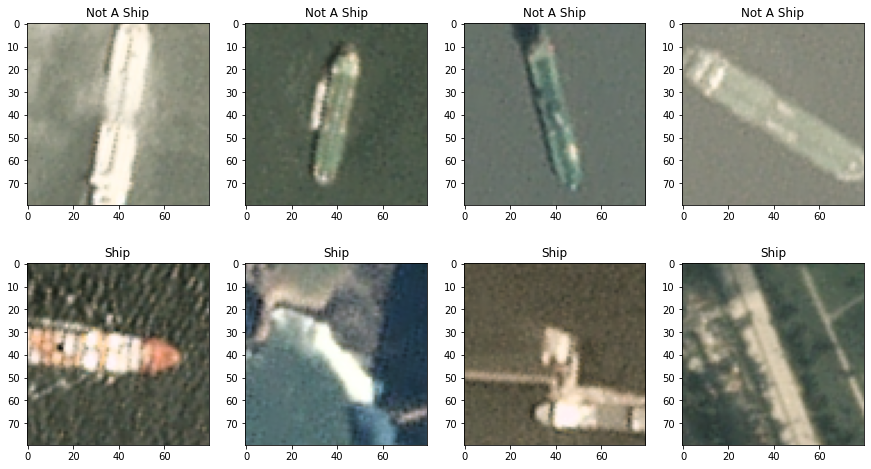

In [40]:
# Plotting the top 4 from each incorrect guess

plt.figure(figsize=(15, 15))
plt.subplot(2,4,1)
plt.title('Not A Ship')
plt.imshow(X_test[537])
plt.subplot(2,4,2)
plt.title('Not A Ship')
plt.imshow(X_test[518])
plt.subplot(2,4,3)
plt.title('Not A Ship')
plt.imshow(X_test[322])
plt.subplot(2,4,4)
plt.title('Not A Ship')
plt.imshow(X_test[206])
plt.subplot(2,4,5)
plt.title('Ship')
plt.imshow(X_test[528])
plt.subplot(2,4,6)
plt.title('Ship')
plt.imshow(X_test[628])
plt.subplot(2,4,7)
plt.title('Ship')
plt.imshow(X_test[662])
plt.subplot(2,4,8)
plt.title('Ship')
plt.imshow(X_test[3])
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0.25)

In [41]:
# Plotting a histogram plot of the pixel intensities to see if I can spot a common pattern as to why they are misclassifying
# those images as ships

# I couldn't really notice any pattern

def plotHistogram(a):

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(a)
    plt.axis('off')
    plt.title('Ship' if y[1] else 'Not A Ship')
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);

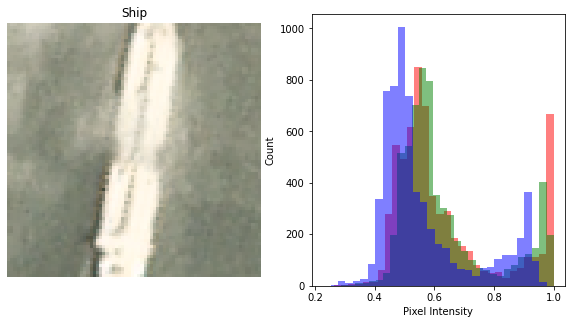

In [42]:
plotHistogram(X_test[537])

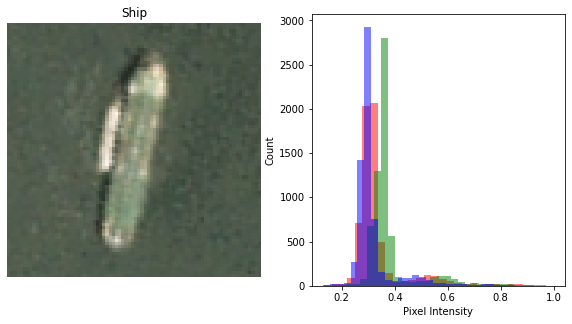

In [43]:
plotHistogram(X_test[518])

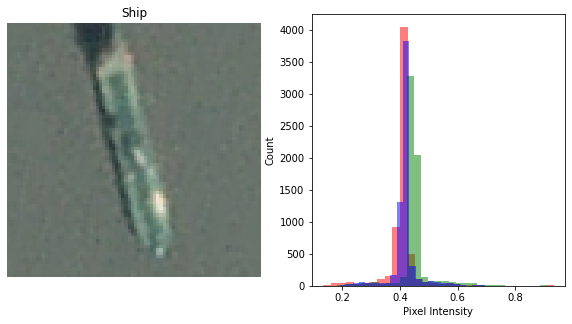

In [44]:
plotHistogram(X_test[322])

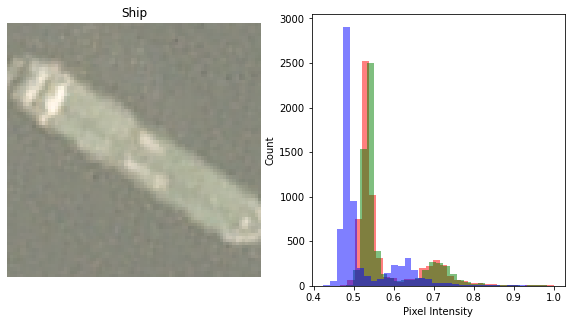

In [45]:
plotHistogram(X_test[206])

# Trying a Convolutional Neural Network Model

In [46]:
# Using a 3x3 kernel and a pooling size of 2x2 at the start of the sequence

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(80, 80, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [47]:
# Training the model

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
75/75 [==============================] - 9s 108ms/step - loss: 0.6915 - accuracy: 0.7332 - val_loss: 0.1868 - val_accuracy: 0.9312
Epoch 2/20
75/75 [==============================] - 7s 99ms/step - loss: 0.1785 - accuracy: 0.9304 - val_loss: 0.1690 - val_accuracy: 0.9413
Epoch 3/20
75/75 [==============================] - 7s 99ms/step - loss: 0.1275 - accuracy: 0.9533 - val_loss: 0.1184 - val_accuracy: 0.9613
Epoch 4/20
75/75 [==============================] - 8s 103ms/step - loss: 0.0813 - accuracy: 0.9704 - val_loss: 0.1119 - val_accuracy: 0.9538
Epoch 5/20
75/75 [==============================] - 8s 103ms/step - loss: 0.0775 - accuracy: 0.9717 - val_loss: 0.1332 - val_accuracy: 0.9575
Epoch 6/20
75/75 [==============================] - 7s 97ms/step - loss: 0.0533 - accuracy: 0.9837 - val_loss: 0.1245 - val_accuracy: 0.9538
Epoch 7/20
75/75 [==============================] - 7s 98ms/step - loss: 0.0541 - accuracy: 0.9858 - val_loss: 0.1333 - val_accuracy: 0.9563
Epoch 8/20

In [48]:
# Finding our final accuracy on the test set

model.evaluate(X_test, y_test)

25/25 [==============================] - 1s 27ms/step - loss: 0.1434 - accuracy: 0.9675


[0.14344508945941925, 0.9674999713897705]

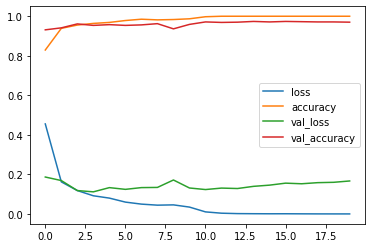

In [49]:
# Plotting the loss and accuracy

pd.DataFrame(history.history).plot();

# Adding Another Convolution and Pooling Layer

In [50]:
# Using a 5x5 kernel and a pooling size of 3x3 at the start of the sequence

# Increasing the number of nodes in the first convolution layer 

# Increasing the pool size in the first pool layer

model = Sequential()
model.add(Conv2D(64, (5, 5), input_shape=(80, 80, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3), input_shape=(80, 80, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [51]:
# Training the model

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
75/75 [==============================] - 17s 218ms/step - loss: 0.4511 - accuracy: 0.7795 - val_loss: 0.2395 - val_accuracy: 0.9025
Epoch 2/20
75/75 [==============================] - 17s 224ms/step - loss: 0.2229 - accuracy: 0.9068 - val_loss: 0.2091 - val_accuracy: 0.9187
Epoch 3/20
75/75 [==============================] - 16s 212ms/step - loss: 0.1813 - accuracy: 0.9172 - val_loss: 0.1571 - val_accuracy: 0.9350
Epoch 4/20
75/75 [==============================] - 17s 228ms/step - loss: 0.1213 - accuracy: 0.9526 - val_loss: 0.1801 - val_accuracy: 0.9450
Epoch 5/20
75/75 [==============================] - 16s 215ms/step - loss: 0.1038 - accuracy: 0.9608 - val_loss: 0.0817 - val_accuracy: 0.9663
Epoch 6/20
75/75 [==============================] - 17s 229ms/step - loss: 0.0580 - accuracy: 0.9772 - val_loss: 0.1425 - val_accuracy: 0.9488
Epoch 7/20
75/75 [==============================] - 16s 212ms/step - loss: 0.0597 - accuracy: 0.9780 - val_loss: 0.0613 - val_accuracy: 0.9775

In [52]:
# Finding our final accuracy on the test set

model.evaluate(X_test, y_test)

25/25 [==============================] - 1s 49ms/step - loss: 0.0913 - accuracy: 0.9837


[0.09131892025470734, 0.9837499856948853]

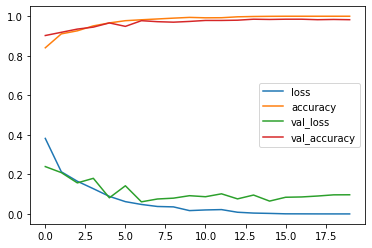

In [53]:
# Plotting the loss and accuracy

pd.DataFrame(history.history).plot();

# Adding More Layers + Drop Out Layers + Increasing Epochs

In [54]:
# Using a 5x5 kernel and a pooling size of 3x3 at the start of the sequence

# Increasing the number of nodes in the first convolution layer 

# Increasing the pool size in the first pool layer

# Adding an extra convolutional layer + drop out layers to prevent over fitting

# Adding an extra dense layer of 50 neurons towards the end

# Increasing the epochs to 50

# Setting my computer on fire

model = Sequential()
model.add(Conv2D(64, (5, 5), input_shape=(80, 80, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), input_shape=(80, 80, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), input_shape=(80, 80, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [55]:
# Training the model

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
75/75 [==============================] - 18s 229ms/step - loss: 0.5759 - accuracy: 0.7308 - val_loss: 0.4137 - val_accuracy: 0.8625
Epoch 2/50
75/75 [==============================] - 18s 243ms/step - loss: 0.3768 - accuracy: 0.8479 - val_loss: 0.2983 - val_accuracy: 0.8850
Epoch 3/50
75/75 [==============================] - 17s 225ms/step - loss: 0.2448 - accuracy: 0.8980 - val_loss: 0.2176 - val_accuracy: 0.9038
Epoch 4/50
75/75 [==============================] - 18s 235ms/step - loss: 0.2242 - accuracy: 0.9130 - val_loss: 0.2129 - val_accuracy: 0.9087
Epoch 5/50
75/75 [==============================] - 16s 218ms/step - loss: 0.1968 - accuracy: 0.9202 - val_loss: 0.1732 - val_accuracy: 0.9388
Epoch 6/50
75/75 [==============================] - 17s 232ms/step - loss: 0.1571 - accuracy: 0.9432 - val_loss: 0.1624 - val_accuracy: 0.9413
Epoch 7/50
75/75 [==============================] - 16s 220ms/step - loss: 0.1337 - accuracy: 0.9507 - val_loss: 0.1559 - val_accuracy: 0.9400

In [56]:
# Finding our final accuracy on the test set

model.evaluate(X_test, y_test)

25/25 [==============================] - 1s 48ms/step - loss: 0.1049 - accuracy: 0.9825


[0.10494958609342575, 0.9825000166893005]

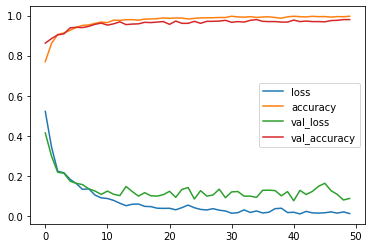

In [57]:
# Plotting the loss and accuracy

pd.DataFrame(history.history).plot();